In [1]:
import pandas as pd

brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')
brfss.info()
brfss

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 96230 to 379327
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       99938 non-null   float64
 1   HTM4      95143 non-null   float64
 2   WTKG3     93404 non-null   float64
 3   INCOME2   83447 non-null   float64
 4   _LLCPWT   100000 non-null  float64
 5   _AGEG5YR  98794 non-null   float64
 6   _VEGESU1  87713 non-null   float64
 7   _HTMG10   95143 non-null   float64
 8   AGE       98794 non-null   float64
dtypes: float64(9)
memory usage: 7.6 MB


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0
...,...,...,...,...,...,...,...,...,...
376876,1.0,173.0,97.52,8.0,12018.935300,3.0,5.57,170.0,32.0
201499,1.0,170.0,68.04,5.0,1939.162770,13.0,2.71,160.0,89.5
192176,1.0,183.0,117.93,4.0,762.342004,8.0,0.53,180.0,57.0
342705,1.0,175.0,61.23,5.0,1417.690180,2.0,4.29,170.0,27.0


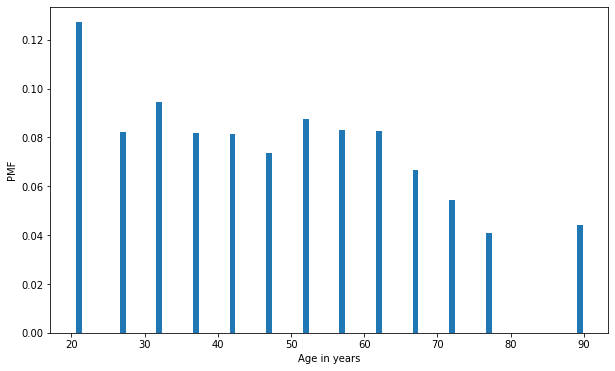

In [2]:
from empiricaldist import Pmf
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

#PMF of age

#Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between
#weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time.
#Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

#The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To
#protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

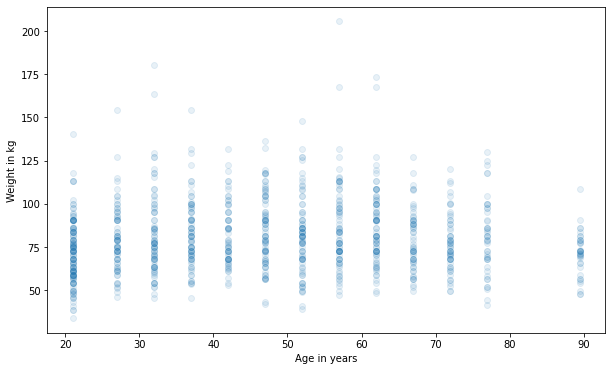

In [3]:
plt.figure(figsize=(10,6))

#Scatter plot

#Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows
#from the brfss DataFrame.

#weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

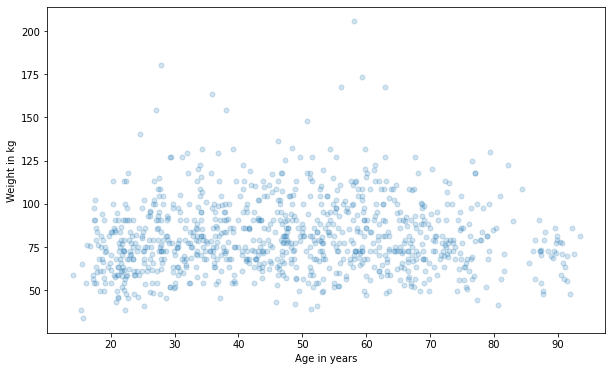

In [4]:
import numpy as np
plt.figure(figsize=(10,6))

#Jittering

#In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the
#scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

#height_jitter = height + np.random.normal(0, 2, size=len(brfss))
#weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))

# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

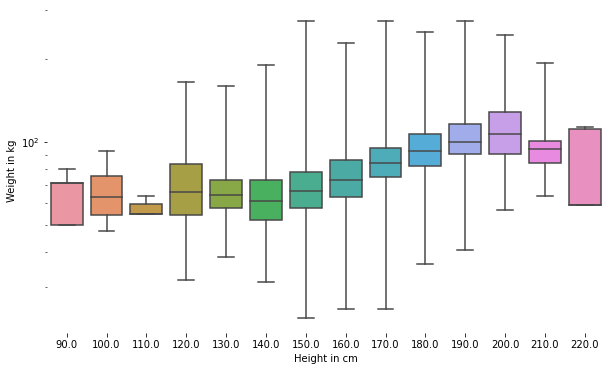

In [5]:
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')
import seaborn as sns
plt.figure(figsize=(10,6))

#Height and weight

#Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take
#a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters,
#binned into 10 cm groups.

#Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

#sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
#plt.yscale('log')

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

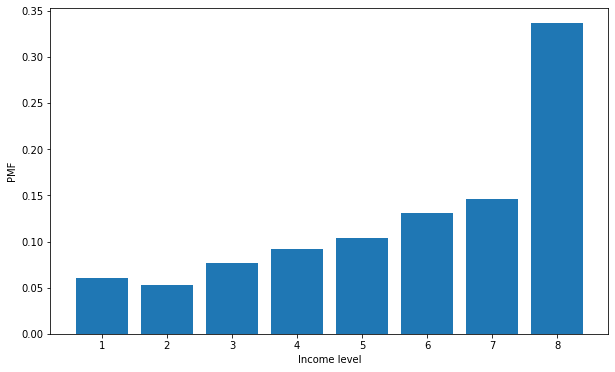

In [6]:
plt.figure(figsize=(10,6))

#Distribution of income

#In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is
#represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name
#is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall
#that all Pmf objects have a .bar() method.

# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

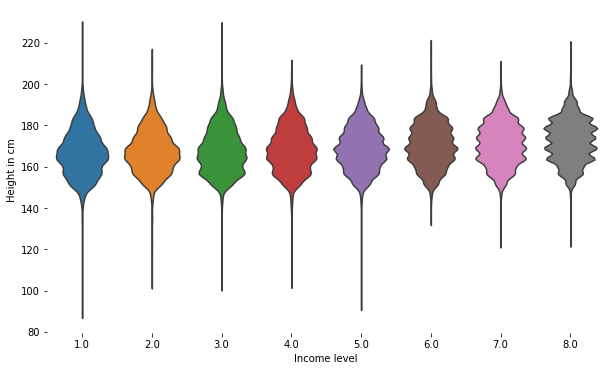

In [7]:
plt.figure(figsize=(10,6))

#Income and height

#Let's now use a violin plot to visualize the relationship between income and height.

# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

In [8]:
#Computing correlations

#The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1'
#represents the number of servings of vegetables respondents reported eating per day.

#Let's see how this variable relates to age and income.

# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


In [9]:
#Interpreting correlations

#In the previous exercise, the correlation between income and vegetable consumption is about 0.12. The correlation between
#age and vegetable consumption is about -0.01.

#Which of the following are correct interpretations of these results:

#A: People with higher incomes eat more vegetables.
#B: The relationship between income and vegetable consumption is linear.
#C: Older people eat more vegetables.
#D: There could be a strong nonlinear relationship between age and vegetable consumption.

#Possible Answers

#A and C only.

#B and D only.

#B and C only.

#A and D only.*

In [10]:
#Income and vegetables

#As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported
#eating per day.

#Let's estimate the slope of the relationship between vegetable consumption and income.

from scipy.stats import linregress

# Extract the variables
#subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
subset = brfss[:1338].dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07342239041594556, intercept=1.5387689143951067, rvalue=0.1207697273106083, pvalue=0.00012902206204389434, stderr=0.019103576231891576)


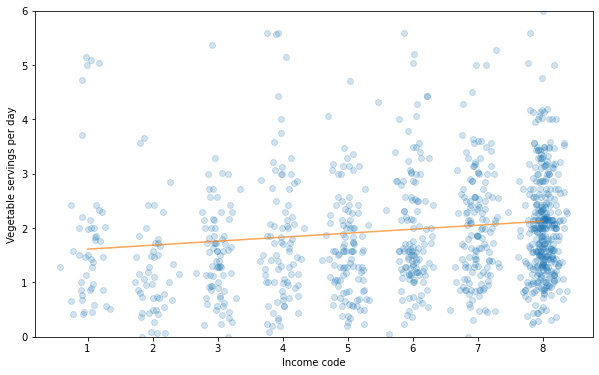

In [11]:
plt.figure(figsize=(10,6))

#Fit a line

#Continuing from the previous exercise:

#- Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

#- res contains the results of a simple linear regression of ys onto xs.

#Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = (res.slope * fx) + res.intercept 
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()